# EDA

This is the exploratory analysis of our dataset.

### pre-processing

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [10]:
db = pd.read_csv('db_clean/titles.csv')

In [11]:
db = db[db['startYear'] < 2023]

In [12]:
db['sex'] = 'male'
db.loc[db['primaryProfession'].str.contains('actress'), 'sex'] = 'female'
db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,replicas,regions,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,sex
0,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0098850,Bouboule,1916,2015,actress,7.3,10977,female
1,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0253767,Lourdes Elizarrarás,1959,2024,"actress,writer,assistant_director",7.3,10977,female
2,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0459441,Rikki Klieman,1948,2024,"actress,editorial_department",7.3,10977,female
3,tt0031359,movie,Gaslight,Gaslight,0,1940,1940,84,"['Mystery', 'Thriller']",19.0,"['PL', 'DE', 'HU', 'ES', 'FR', 'NL', 'US', 'BR...",nm0131808,Joe Camilleri,1948,2024,"actor,soundtrack,composer",7.3,4856,male
4,tt0031359,movie,Gaslight,Gaslight,0,1940,1940,84,"['Mystery', 'Thriller']",19.0,"['PL', 'DE', 'HU', 'ES', 'FR', 'NL', 'US', 'BR...",nm0268426,Betty Farrington,1898,1989,"actress,soundtrack",7.3,4856,female


In [82]:
byYear = db.groupby('startYear').agg({
    'averageRating':'mean',
    'numVotes':'sum',
    'sex': lambda e: [sum(e == 'male'), sum(e =='female')]
})
byYear['males'] = byYear['sex'].apply(lambda e: e[0])
byYear['females'] = byYear['sex'].apply(lambda e: e[1])

### DISTRIBUTION OF RATINGS

Since ratings are the focus of this study, lets plot the distribution of ratings for all movies.

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


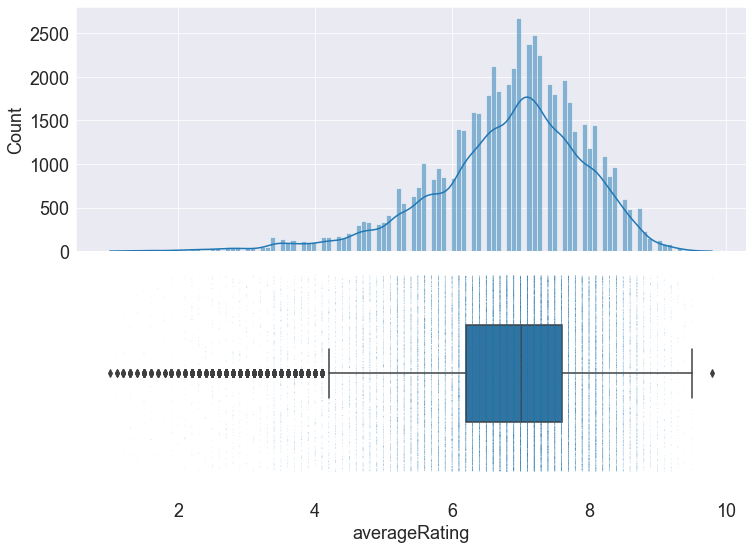

In [63]:
fig1, axs = plt.subplots(nrows=2)

sns.histplot(db['averageRating'], kde=True, ax=axs[0])
sns.stripplot(db['averageRating'], orient='h', jitter=0.4, size=.8, ax=axs[1], alpha=0.2)
sns.boxplot(db['averageRating'], orient='h', width=0.4, ax=axs[1], showfliers=True)

spacer = np.max(db['averageRating']) * 0.05
xmin = np.min(db['averageRating']) - spacer
xmax = np.max(db['averageRating']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

plt.subplots_adjust(hspace=0)
axs[1].set_facecolor('white')

The plot shows that the distribution of ratings has a mean of around 6.5, and it is skewed to the left. This means that the majority of the ratings for the movies in the dataset are clustered towards the higher end of the scale, but there are also many movies that have very low ratings, as we can see from the outliers that fall below the first quartile of the box plot.
However, there is no reason to remove these outliers.

We can also look at the distribution of ratings compared to the number of votes those movies got:

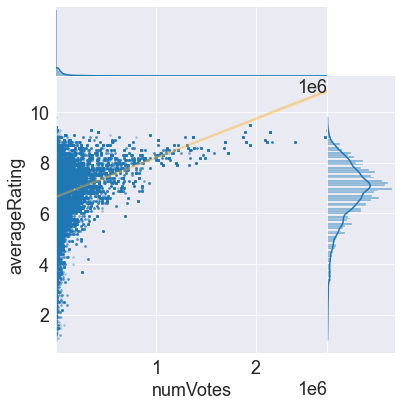

In [67]:
sns.jointplot(
    x='numVotes', y='averageRating', data=db, kind="reg", ratio=4, space=0,
    scatter_kws={'s': 3,'alpha': 0.25}, line_kws={'color': 'orange', 'alpha':0.3}
)

Movies with a higher number of reviews tend to have higher ratings, with movies that have over 1,000,000 reviews being almost exclusively rated above an 8. This trend suggests that movies that are highly rated are more likely to be seen and reviewed by a larger audience.

However, it is important to note that while highly rated movies may have more reviews, the opposite is not necessarily true. The plot indicates that movies with low numbers of votes have ratings that are distributed almost equally from 10 to 0. This suggests that there is no clear relationship between the number of votes a movie receives and its rating. Movies with a low number of votes may be less well-known or less popular, which could contribute to the more varied distribution of ratings.

### YEAR AND RATING

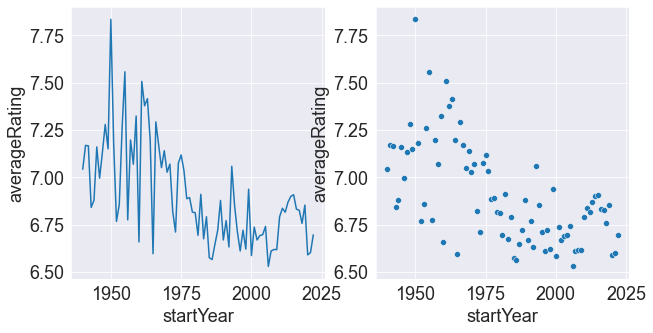

In [71]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.lineplot(x='startYear', y='averageRating', data=byYear, ax = axes[0])
sns.scatterplot(x='startYear', y='averageRating', data=byYear,ax = axes[1])
plt.show()

The line and scatter plot show a general trend of decreasing average rating over time, indicating that the overall quality of movies has decreased over the years. This suggests that movies produced in recent years have been receiving lower ratings compared to movies produced in earlier years.
However, if instead of taking the average of each year we look at all the movies:

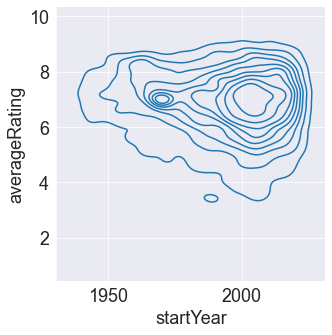

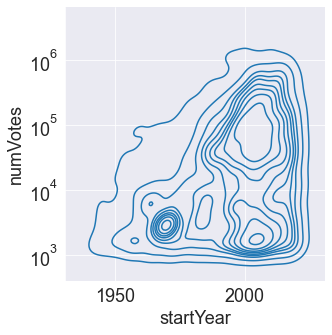

In [70]:
sns.displot(x='startYear', y='averageRating', data=db, kind="kde")
sns.displot(db, x='startYear', y='numVotes', kind='kde', log_scale=(False,True))
plt.show()

Based on our the plot, it appears that the number of high-rated movies in recent years is similar to the number of high-rated movies in previous years. However, our the plot indicates a general increase in the number of movies produced over time, which may have led to a corresponding increase in the number of low-rated movies. Therefore, although the proportion of high-rated movies has remained constant, the overall number of bad-rated movies has increased over time.

One hypothesis for why there would be more bad-rated movies in recent years than before is based on the fact that old movies that are bad may not have reached the threshold of 1000 reviews in our dataset. This could be because people are less likely to watch old bad movies and hence there are fewer reviews for such movies. However, in recent movies are more widely available on cinemas and streaming sites, which could lead to more people watching and reviewing them even if they are bad.

### ACTOR GENDER AND RATING

Studying the relationship between the gender of the actors and the rating of the movie is interesting for several reasons. Firstly, it can provide insights into how gender representation in movies affects audience perception and enjoyment of the film. This is particularly important in the context of the ongoing conversations surrounding diversity and representation in the media.Secondly, analyzing the relationship between the gender of the actors and the rating of the movie can also help us to understand the potential biases that exist in the movie industry. For example, it is possible that movies with male leads are more likely to receive high ratings than those with female leads, due to gender biases that may exist among audiences and/or critics.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

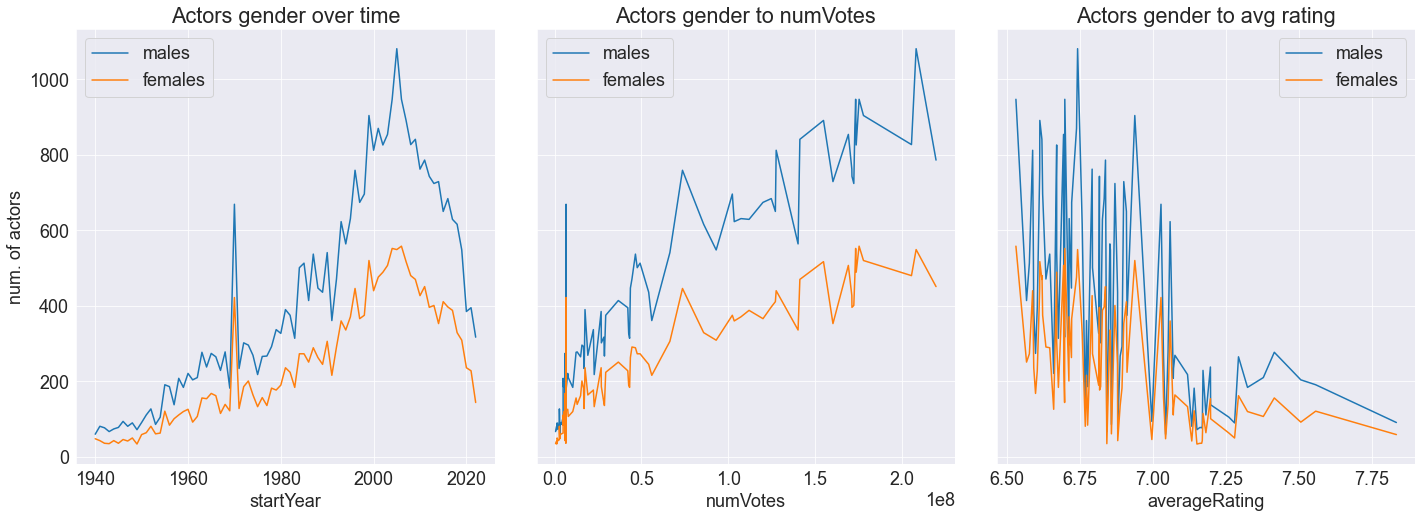

In [15]:
fig, axs = plt.subplots(ncols=3, sharey='row', figsize=(24,8))
sns.lineplot(x='startYear', y='males', data=byYear, ax=axs[0])
sns.lineplot(x='startYear', y='females', data=byYear, ax=axs[0])
axs[0].legend(['males','females'])
axs[0].set_ylabel('num. of actors')
axs[0].set_title('Actors gender over time')


sns.lineplot(x='numVotes', y='males', data=byYear, ax=axs[1])
sns.lineplot(x='numVotes', y='females', data=byYear, ax=axs[1])
axs[1].legend(['males','females'])
axs[1].set_ylabel('num. of actors')
axs[1].set_title('Actors gender to numVotes')

sns.lineplot(x='averageRating', y='males', data=byYear, ax=axs[2])
sns.lineplot(x='averageRating', y='females', data=byYear, ax=axs[2])
axs[2].legend(['males','females'])
axs[2].set_ylabel('num. of actors')
axs[2].set_title('Actors gender to avg rating')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout

<AxesSubplot:xlabel='averageRating', ylabel='sex'>

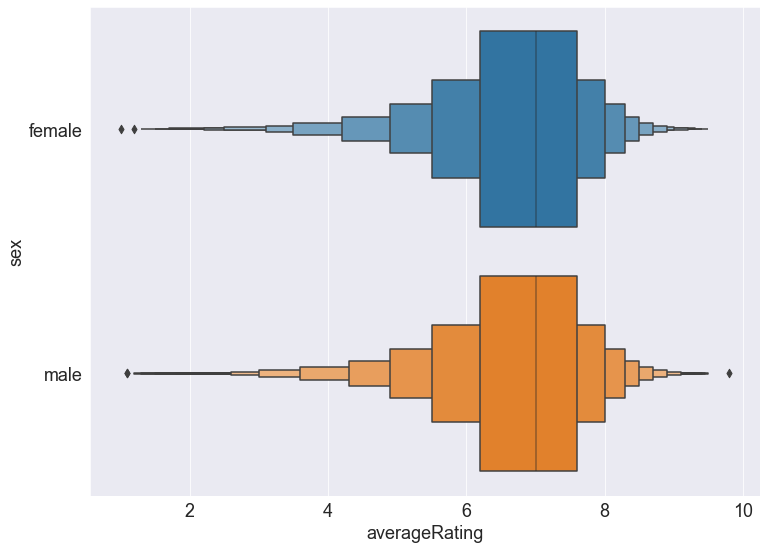

In [17]:
sns.boxenplot(data=db, x='averageRating', y='sex')

As evidenced by the data, there is a consistent disparity between the number of male and female actors in movies, regardless of the year or rating of the film. The majority of movies in the dataset feature more male actors than female actors. However, when examining the relationship between the number of votes and the gender of the actors, there appears to be a more pronounced increase in the number of male actors as the number of votes increases. In other words, it appears that as movies become more popular, there is a greater likelihood that they will feature more male actors.

Despite this trend, the data also indicates that the gender of the actors does not have a significant impact on the rating of the movie. The final graph suggests that, overall, there is no substantial difference in the ratings of movies featuring male actors versus those featuring female actors. Therefore, while there may be disparities in the representation of male and female actors in movies, these differences do not appear to translate to differences in audience perception of the films.

It is worth noting that these findings are based on the analysis of this specific dataset, they may not necessarily be representative of the movie industry. This is because the imdb dataset might register one gender more often than the other. We also have no information about the importance of the roles in the movies.

### RATINGS AND REGIONS
We can also look at whether the ratings of movies change from region to region. In other words, we want to see if there are regions that in general rate movies higher than others. Votes come from 243 different regions

In [74]:
regions = db[['tconst', 'regions', 'averageRating', 'numVotes']].groupby('tconst').agg('first')
dictz = {
    '[':'',
    ']':'',
    '\'':''
}
for k,v in dictz.items():
    regions.regions = regions['regions'].str.replace(k, v)

regions.regions = regions['regions'].str.split(',')
regions = regions.explode('regions')
byRegion = regions.groupby('regions').agg(
    {'averageRating': 'mean', 'numVotes': 'sum'}
).reset_index().sort_values('numVotes', ascending=False)

<ipython-input-74-fd7b8ef4723f>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  regions.regions = regions['regions'].str.replace(k, v)


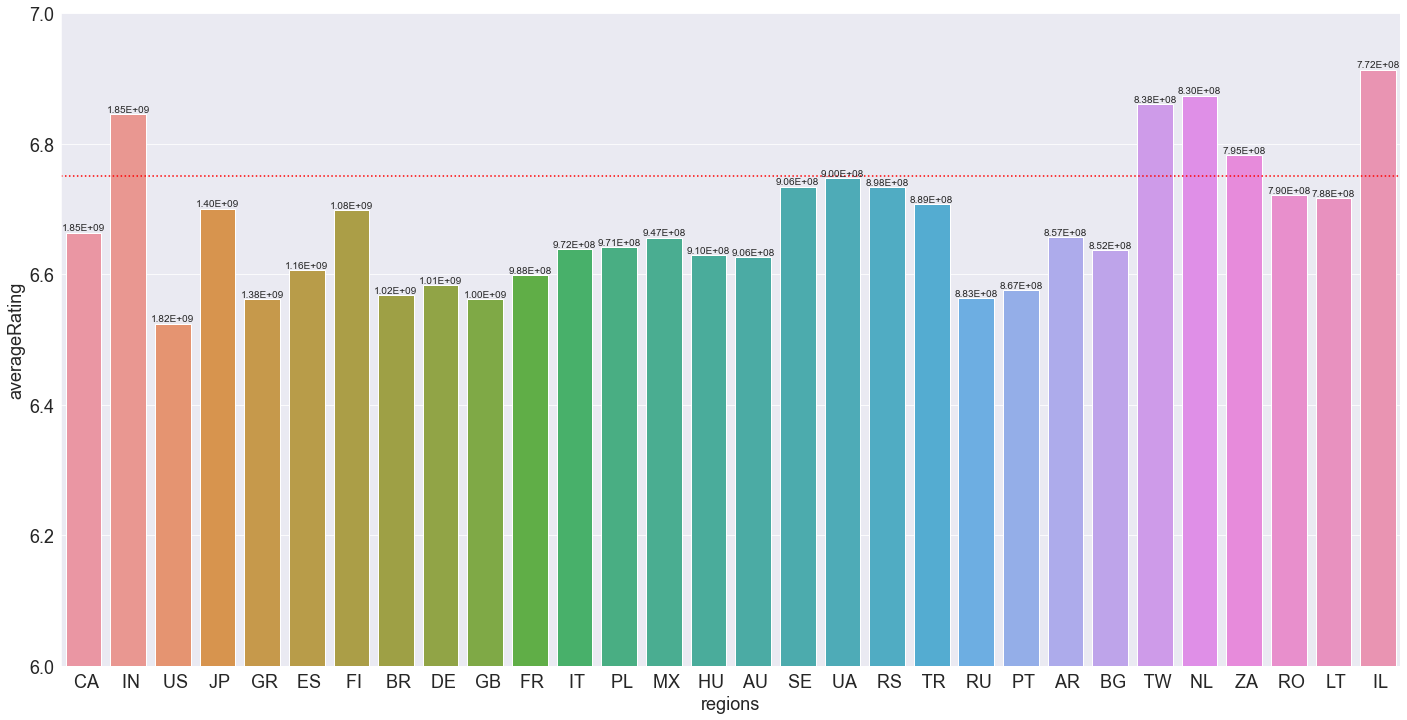

In [24]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(x='regions', y='averageRating', data = byRegion.head(30), ax=ax)
ax.axhline(y=byRegion['averageRating'].median(), color='red', linestyle='dotted')
ax.set_ylim((6,7))

for i,patch in enumerate(ax.patches):
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    tick = ax.xaxis.get_majorticklabels()[i].get_text()
    votes = int(byRegion[byRegion['regions'] == tick].numVotes)
    ax.annotate(f'{votes:.2E}', (x.mean(), y), ha='center', va='bottom', size=10)


### GENRES
We can visualize the popularity of genres for every year since 1940 till today. We will do this by making an area chart.

In [75]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'first','genres':'first'}
movie_genres = db.groupby('primaryTitle').agg(aggregator).reset_index()
movie_genres.head()

,primaryTitle,tconst,startYear,averageRating,numVotes,genres
0,(T)Raumschiff Surprise - Periode 1,tt0349047,2004,5.4,16083,"['Comedy', 'Sci-Fi']"
1,*batteries not included,tt0092494,1987,6.6,36409,"['Comedy', 'Family', 'Fantasy']"
2,...And God Created Woman,tt0049189,1956,6.3,8777,"['Drama', 'Romance']"
3,.45,tt0259822,2006,5.5,8702,"['Crime', 'Drama', 'Thriller']"
4,.hack//SIGN,tt0361140,2002,6.8,1361,"['Action', 'Adventure', 'Animation']"


In [76]:
# Here we count the number of occurrences of each genre per year
def count_word_occurrences(s):
    word_counts = {}
    s = s[1:len(s)-1]
    words = s.split(', ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

# Group the dataframe by decade and apply the function to count the word occurrences
final_counts = []
grouped_by_decade = movie_genres.groupby((movie_genres['startYear']))
for year, group in grouped_by_decade:
    total_word_counts = {}
    for word_counts in group['genres'].apply(lambda x: count_word_occurrences(x)):
        for word, count in word_counts.items():
            if word in total_word_counts:
                total_word_counts[word] += count
            else:
                total_word_counts[word] = count
    sorted_word_counts = dict(sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True))
    final_counts.append(sorted_word_counts)

In [77]:
# Convert the dictionaries to dataframes and stack them
dfs_by_year = [pd.DataFrame.from_dict(d, orient='index', columns=[f'{year}']) for year, d in enumerate(final_counts, start=1940)]
df_stacked = pd.concat(dfs_by_year, axis=1)
df_stacked = df_stacked.fillna(0)
df_normed = df_stacked.div(df_stacked.sum(axis=0), axis=1)

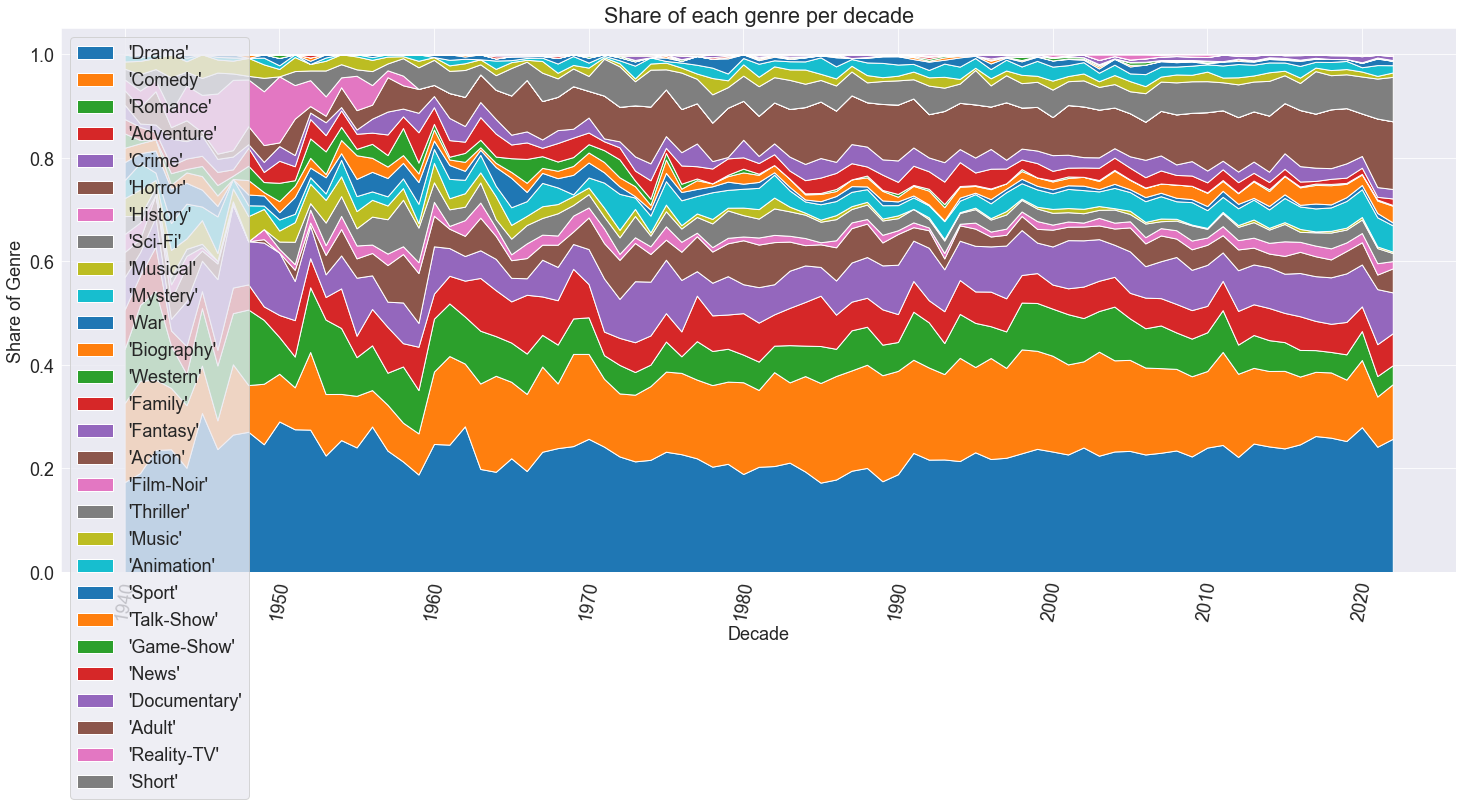

In [78]:
# Create stacked band plot
plt.figure(figsize=(25, 10))
plt.stackplot(df_normed.columns, df_normed.values, labels=df_normed.index)
# Add legend and axis labels
plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Share of Genre')
plt.title('Share of each genre per decade')
plt.xticks(df_normed.columns[0::10],rotation = 80)
# Show the plot
plt.show()

The evolution of movie genres over time is a fascinating subject that sheds light on the shifting tastes and interests of audiences. While some genres have remained perennially popular, such as drama and romance, others have risen to prominence and then faded away. For example, action and horror films have enjoyed a surge in popularity since the 1970s,which was fueled by advances in special effects and a growing appetite for high-octane, adrenaline-fueled entertainment. Another example is film noir, a brief but influential trend that emerged in the 1940s, it is a dark and moody genre that reflected the anxieties and uncertainties of the time.

To study how the distribution of ratings for each genre we can create a boxplot for each one.

In [79]:
genres = pd.DataFrame(columns = ['genre1', 'genre2', 'genre3','rating'])
genres[['genre1', 'genre2', 'genre3']] = movie_genres['genres'].str.split(',', expand=True)
genres['rating'] = movie_genres.averageRating

genres['genre1'] = genres['genre1'].map(lambda x: x.lstrip('[').rstrip(']') if x is not None else x)
genres['genre2'] = genres['genre2'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres['genre3'] = genres['genre3'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres.head()

,genre1,genre2,genre3,rating
0,'Comedy','Sci-Fi',None,5.4
1,'Comedy','Family','Fantasy',6.6
2,'Drama','Romance',None,6.3
3,'Crime','Drama','Thriller',5.5
4,'Action','Adventure','Animation',6.8


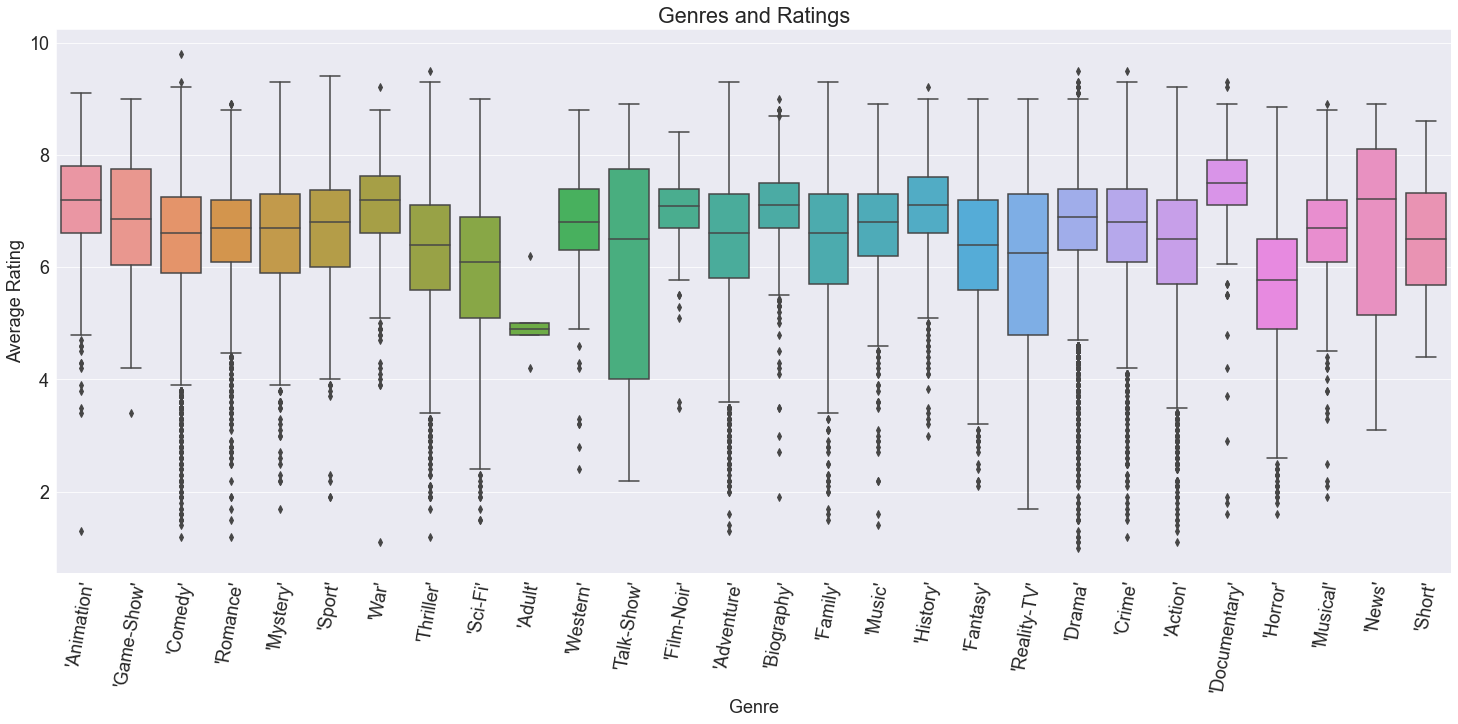

In [80]:
# Get unique genres
unique_genres = set(genres['genre1'].unique().tolist() + genres['genre2'].unique().tolist() + genres['genre3'].unique().tolist())
unique_genres.discard(None)

# Group by genre and extract ratings as arrays
genre_ratings = []
for genre in unique_genres:
    ratings = genres.loc[(genres['genre1'] == genre) | (genres['genre2'] == genre) | (genres['genre3'] == genre), 'rating'].values
    genre_ratings.append(ratings)

plt.figure(figsize=(25, 10))
sns.boxplot(data=genre_ratings)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Genres and Ratings')
plt.gca().set_xticklabels(unique_genres)
plt.xticks(rotation = 80)
plt.show()

The plot demonstrates that there is a clear variation in the ratings of different movie genres. Some genres, such as documentaries, tend to have a higher mean rating than most other genres. However, it is worth noting that documentaries also have a number of outliers, indicating that while there are many highly rated documentaries, there are also some that are rated poorly. Other genres, such as war movies, tend to be consistently highly rated, with ratings that are almost always above a 5.

Interestingly, the most popular genres, such as drama, action, and romance, have the largest range of ratings. This suggests that these genres may be more polarizing, with some movies being highly rated and others being poorly rated.

### CORRELATION OF NUMERICAL VARIABLES

The plot shows averageRating being correlated to numVotes which makes sense, and startYear to endYear (again understandable). We can see there is barely any correlation between the rating of a movie and any of the other variables, which would make it very hard to train a model to predict ratings from these features.

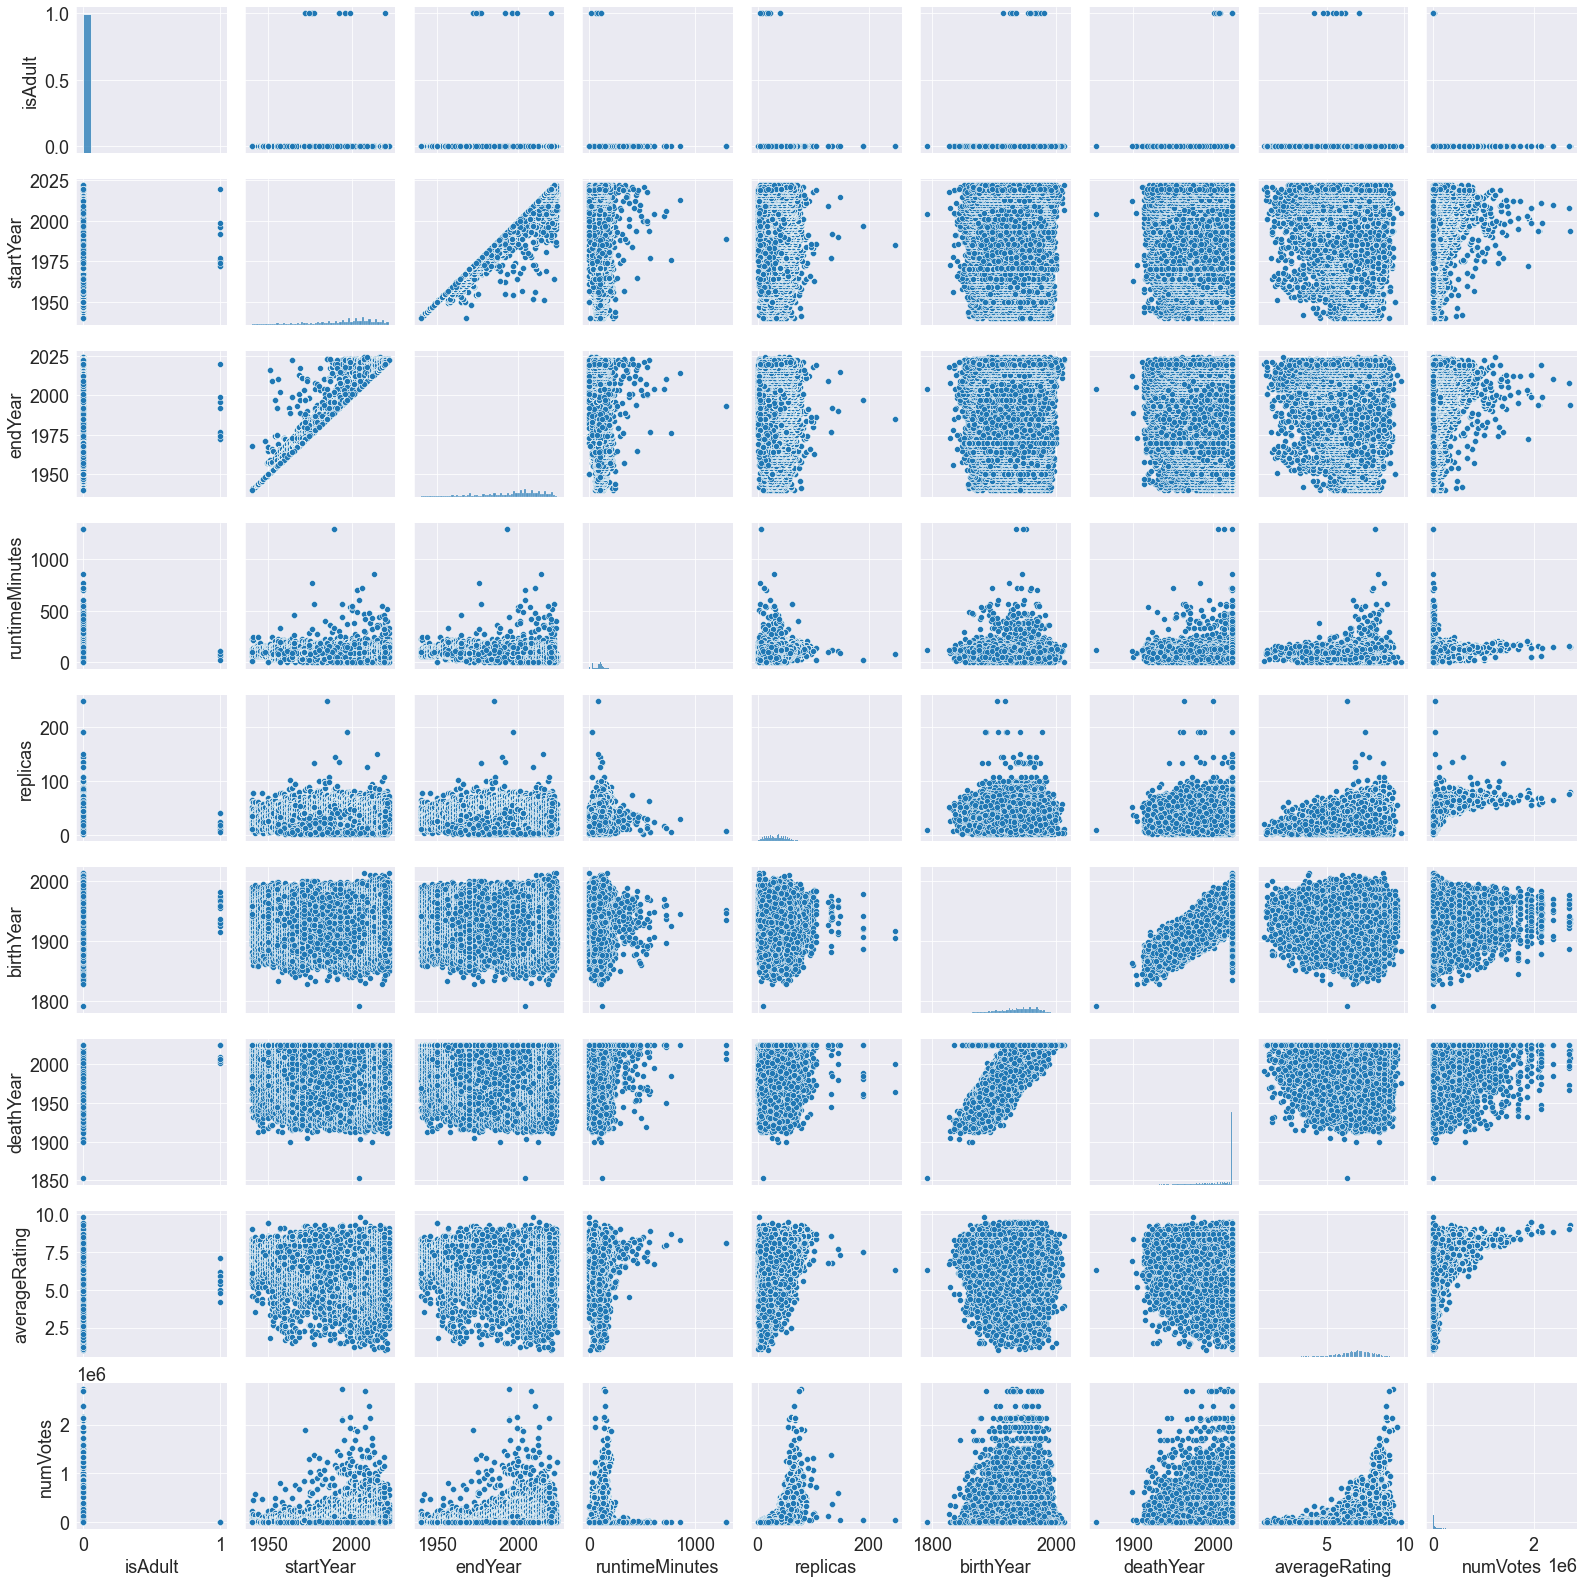

In [26]:
numeric = db.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sns.pairplot(numeric)

<AxesSubplot:>

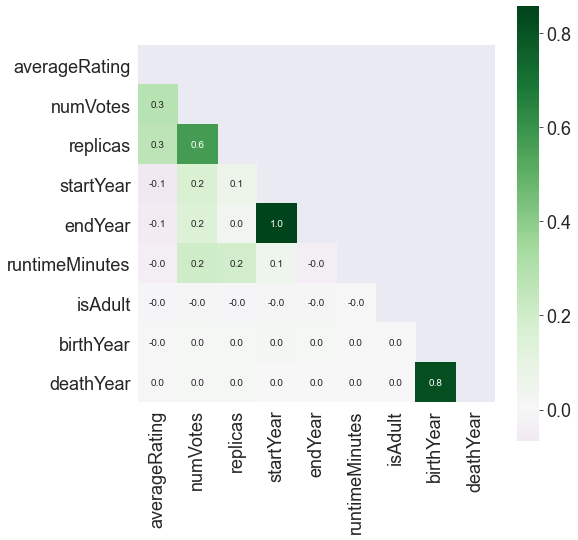

In [83]:
dset = db
s = dset.corr().loc[:, 'averageRating'].abs().sort_values(ascending=False)
s = dset.loc[:, list(s.index)].corr()
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(8, 8))
sns.heatmap(s, mask=mask, square=True, cmap='PRGn', center=0, robust=True, annot=True, annot_kws={"size":10}, fmt='.1f')

### CONCLUSION
In conclusion, the exploratory data analysis reveals several important insights into the relationship between movie ratings and several key variables, including the year of release, gender of the actors, number of votes, and genre. The analysis showed that, overall, the average movie rating has decreased over time. This could be due to several factors, including changes in audience tastes and preferences, as well as an increase in the number of movies being produced each year.

Additionally, the analysis indicated that there are consistently more male actors than female actors in movies, regardless of the year or rating. However, the gender of the actors did not appear to have a significant impact on the rating of the movie.

Movies that had more votes generally receiving higher ratings, while we found that the opposite is not true. Furthermore, some genres tended to be rated higher than others, with documentaries and war movies having a higher mean rating than most other genres.

Overall, the insights provided by the exploratory data analysis can be useful for filmmakers, movie studios, and other stakeholders in the movie industry. By understanding the factors that impact movie ratings, they can create movies that are more likely to be successful and well-received by audiences.

### ETHICAL CONCERNS
One important ethical consideration that arises from using data from an IMDb dataset is the potential for unreliability and inaccuracies in the data. IMDb is a user-generated platform, which means that the data is contributed by users who may have varying levels of expertise and objectivity. As a result, the data may contain errors, biases, or other inaccuracies that could affect the reliability of the analysis.

Moreover, the use of this data to inform decision-making could also have unintended consequences, particularly if the data is used to make decisions that affect certain groups of people. For example, if movie producers rely solely on IMDb ratings to make decisions about which movies to produce, they may inadvertently exclude certain types of movies or actors from consideration, based on biases or prejudices inherent in the ratings.

Furthermore, there is a risk that the ratings on IMDb could be influenced by certain groups or individuals, such as those with the means to manipulate the data or those who have a vested interest in promoting a particular movie or actor. This could lead to inaccurate or biased ratings, which could affect decision-making and ultimately impact the movie industry as a whole.

In light of these concerns, it is important to approach the results of this analysis with caution, recognizing the limitations of the data and the potential for biases or inaccuracies to impact the findings. It is also important to consider alternative sources of data and information, and to approach decision-making with a critical and thoughtful perspective that takes into account the potential consequences for all stakeholders involved.


### MADE IT TO THE TOP 10!
While not a critical component of the overall exploratory data analysis, it may be worth noting the top titles and actors based on the data. This information might be of interest to people.


### Most recurrent titles
Series with high number of episodes, or movies with many replicas

In [84]:
aggregator = {'replicas':'max','averageRating':'mean', 'numVotes':'sum', 'startYear':'first'}
byReplicas = db.groupby('primaryTitle').agg(aggregator).sort_values('replicas', ascending = False)
byReplicas.head(10)

,replicas,averageRating,numVotes,startYear
primaryTitle,,,,
The Black Cauldron,247.0,6.300000,75714,1985
Pokémon,190.0,7.500000,311521,1997
Shaun the Sheep Movie,149.0,7.300000,41711,2015
Home Alone,144.0,7.700000,3600822,1990
Home Alone 2: Lost in New York,134.0,6.800000,1860930,1992
Star Wars: Episode IV - A New Hope,132.0,8.600000,17956276,1977
A Christmas Carol,126.0,7.692308,452009,1951
Aliens,106.0,8.400000,6541596,1986
Demon Slayer: Kimetsu no Yaiba,106.0,8.700000,224242,2019


### Top-rated titles
titles where averageRating is the highest

In [85]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'sum'}
bestMovies = db.groupby('primaryTitle').agg(aggregator).reset_index().sort_values('averageRating', ascending=False)
bestMovies.head(10)

,primaryTitle,tconst,startYear,averageRating,numVotes
3099,Choufli Hal,tt7151672,2005,9.8,2596
2484,Breaking Bad,tt0903747,2008,9.5,29188905
5368,Formula 1,tt6758316,1950,9.4,51744
16652,The Shawshank Redemption,tt0111161,1994,9.3,5436804
11161,Pretenders,tt0316613,2002,9.3,10118
15452,The Joy of Painting,tt0383795,1983,9.3,5652
17238,The Wire,tt0306414,2002,9.3,4873442
15021,The Godfather,tt0068646,1972,9.2,20777405
11257,Prosjaci i sinovi,tt0066704,1971,9.2,1011
17276,The World at War,tt0071075,1973,9.2,26538


### Top-rated actors
Based on movie ratings.

In [87]:
top_actors = db.groupby(['tconst']).aggregate({
    'primaryName':lambda e: ', '.join(e.unique()),
    'primaryTitle':lambda e: ', '.join(e.unique()),
    'startYear': 'min',
    'averageRating':'max',
    'numVotes':'max'
})
top_actors.sort_values('averageRating',ascending=False).head(10)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt7151672,William Austin,Choufli Hal,2005,9.8,2596
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1945927
tt6758316,"Pierre Badel, Bonnie Bianco, Joan Frank, Jack ...",Formula 1,1950,9.4,3234
tt0306414,"Hans Abich, Alex Barad, Philip L. Boddy, Elio,...",The Wire,2002,9.3,348103
tt9471404,Wanda Luczycka,The Chosen,2017,9.3,34549
tt0383795,Barry Sobel,The Joy of Painting,1983,9.3,5652
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2718402
tt0316613,"Emil Bruun, Tat-Ming Cheung",Pretenders,2002,9.3,5059
tt0077051,"Michael Bates, Gernot Bock-Stieber, Dieter Boh...",Matador,1978,9.3,4983


In [88]:
top_actors.sort_values('numVotes' , ascending=False).head(10)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2718402
tt0468569,"Sela Ward, Robert Carradine, Troy Donahue, Ton...",The Dark Knight,2008,9.0,2691140
tt1375666,"Timothy Hutton, Laura Gemser, Don Buchsbaum, T...",Inception,2010,8.8,2388309
tt0137523,"Brian Robbins, Liz Torres, Tânia Gomide, Edgar...",Fight Club,1999,8.8,2161922
tt0944947,"Ben Chaplin, Wilda Bieber, Mikhail Bolduman, A...",Game of Thrones,2011,9.2,2141380
tt0109830,"Colm Meaney, Kerim Afsar, Luis Alcoriza, Kurti...",Forrest Gump,1994,8.8,2113276
tt0110912,"George Peppard, Victoria Principal, Barbara Ba...",Pulp Fiction,1994,8.9,2087527
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1945927
tt0133093,"Ian Abercrombie, Persis Khambatta, Patrick Mul...",The Matrix,1999,8.7,1938760
